In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection,linear_model,svm,datasets

In [2]:
def load_data_regression():
    diabetes=datasets.load_diabetes()
    return model_selection.train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0)

X_train,X_test,y_train,y_test=load_data_regression()

In [3]:
def load_iris_data():
    data_iris=datasets.load_iris()
    return model_selection.train_test_split(data_iris.data,data_iris.target,test_size=0.25,random_state=0)

Xiris_train,Xiris_test,yiris_train,yiris_test=load_iris_data()

#### iris是分类问题

In [7]:
def test_LinearSVC(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.LinearSVC()
    cls.fit(X_train,y_train)
    print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
    print("Score:%.2f" % cls.score(X_test,y_test))
    
test_LinearSVC(Xiris_train,Xiris_test,yiris_train,yiris_test)

Coeff:[[ 0.21779091  0.3984194  -0.83300628 -0.41992427]
 [ 0.02758709 -0.80709191  0.39158522 -0.90822004]
 [-1.08576788 -0.78197135  1.61127386  1.50161293]], intercept:[ 0.10834838  1.50900669 -1.25404509]
Score:0.92


In [11]:
def test_LinearSVC_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['hinge','squared_hinge']
    for loss in losses:
        cls=svm.LinearSVC(loss=loss)
        cls.fit(X_train,y_train)
        print("Loss:%s" %loss)
        print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
        print("Score:%.2f" % cls.score(X_test,y_test))
test_LinearSVC_loss(Xiris_train,Xiris_test,yiris_train,yiris_test)  

Loss:hinge
Coeff:[[ 0.36658297  0.32433499 -1.07948639 -0.56206601]
 [ 0.26735859 -0.96478262  0.18978881 -0.73870101]
 [-1.27982543 -1.04958146  1.90765366  1.97715006]], intercept:[ 0.17632114  0.67246442 -1.50035202]
Score:0.84
Loss:squared_hinge
Coeff:[[ 0.21778842  0.39841934 -0.83301231 -0.41993053]
 [ 0.02738557 -0.80688023  0.39172687 -0.90809324]
 [-1.08565221 -0.78194219  1.61139704  1.50161964]], intercept:[ 0.10834652  1.50932958 -1.25397135]
Score:0.92


In [12]:
def test_LinearSVC_reg(*data):
    X_train,X_test,y_train,y_test=data
    regs=['l1','l2']
    for reg in regs:
        cls=svm.LinearSVC(penalty=reg,dual=False)
        cls.fit(X_train,y_train)
        print("Penalty:%s" %reg)
        print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
        print("Score:%.2f" % cls.score(X_test,y_test))
test_LinearSVC_reg(Xiris_train,Xiris_test,yiris_train,yiris_test)  

Penalty:l1
Coeff:[[ 0.16169758  0.52336447 -0.93085509  0.        ]
 [ 0.         -0.84981714  0.36767695 -0.83702667]
 [-0.82015186 -0.76838314  1.40125152  1.67879722]], intercept:[ 0.          1.80595171 -2.24210498]
Score:0.92
Penalty:l2
Coeff:[[ 0.21913494  0.39632008 -0.83567138 -0.41726075]
 [ 0.02771728 -0.8078901   0.39130354 -0.90768387]
 [-1.0859648  -0.78192929  1.61142085  1.50151589]], intercept:[ 0.11179235  1.51084483 -1.25404219]
Score:0.92


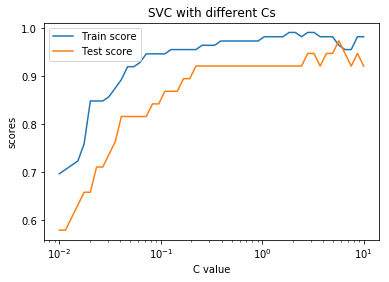

In [16]:
def test_LinearSVC_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for c in Cs:
        cls=svm.LinearSVC(C=c)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Train score")
    ax.plot(Cs,test_scores,label="Test score")
    ax.set_xscale('log')
    ax.set_xlabel("C value")
    ax.set_ylabel(r"scores")
    ax.set_title("SVC with different Cs")
    ax.legend(loc="best")
    plt.show()
    
test_LinearSVC_C(Xiris_train,Xiris_test,yiris_train,yiris_test)  

> 惩罚项太小的时候,训练出的结果不是很好